Você decidiu abrir uma pequena cafeteria com garçons robôs em Los Angeles. É um projeto bem promissor, mas caro, então você e seus parceiros decidem tentar atrair investidores. Eles estão interessados nas condições atuais do mercado e querem saber se você conseguirá manter seu sucesso quando a novidade de garçons robôs esmorecer.

Você é um guru de análise, então seus parceiros te pediram para preparar uma pesquisa do mercado. Você tem dados de código aberto sobre restaurantes em LA.

## <b> Carregue os dados e prepare-os para a análise<b>

In [118]:
#importando bibliotecas

from matplotlib import ticker
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#importando os dados
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
print(rest_data[rest_data['chain'].isnull()])

         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   
7523  19309     JAMMIN JIMMY'S PIZZA   1641 FIRESTONE BLVD   NaN       Pizza   
8648  20434    THE LEXINGTON THEATER          129 E 3RD ST   NaN  Restaurant   

      number  
7408      14  
7523       1  
8648      35  


É possíver analisar que existem dados faltantes na coluna chain. Vamos verificar se há dados duplicados também.

In [6]:
rest_data.duplicated().value_counts()

False    9651
dtype: int64

Com isso é possível concluir que não há dados duplicados. <br>
Para tratar os dados faltantes, é possível seguir 3 abordagens: preencher com os valores que mais se repetem, eliminar completamente essas linhas ou preencher com algo como 'Indefinido'. 

Como forma de preservar os dados e não alterar os resultados, vamos preencher os valores com 'Indefinido'.

In [7]:
rest_data['chain'] = rest_data['chain'].fillna('Indefinido')

In [8]:
display(rest_data[rest_data['chain'] == 'Indefinido'])

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,Indefinido,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,Indefinido,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,Indefinido,Restaurant,35


## Análise de dados

### Investigue as proporções de vários tipos de estabelecimentos. Construa um gráfico.

Para fazer essa análise, primeiramente é necessário fazer um filtro para que seja calcuculado os valores que mais se repetem, vou fazer isso usando o value_counts()

In [98]:
top_rest_type = rest_data['object_type'].value_counts().reset_index()

top_rest_type.columns = ['Tipo','Contagem_Estabelecimento']


display(top_rest_type)

,Tipo,Contagem_Estabelecimento
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


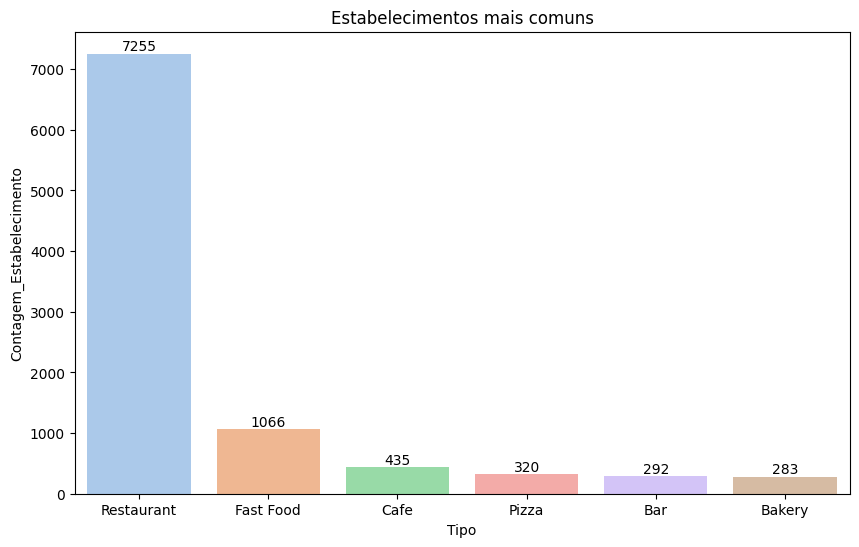

In [99]:
#plotando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_rest_type, x='Tipo', y='Contagem_Estabelecimento', palette="pastel")

#definindo valores para aparecem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',          
                (p.get_x() + p.get_width() / 2,   
                 p.get_height()),                 
                ha='center', va='bottom',          
                fontsize=10, color='black')        

plt.title('Estabelecimentos mais comuns')
plt.show()


De todos os tipos de estabelecimento, Restaurante sem dúvidas tem destaque com 7255 estabelecimentos. Em segundo lugar, temos fast food e em terceiro, cafés, que somando os dois, não se aproxima nem da metade da contagem de restaurantes.

### Investigue as proporções de estabelecimentos de rede e não. Construa um gráfico.

Como foi feito acima, primeiro é necessário fazer um cálculo antes de plotar o gráfico. Vamos usar o value_counts.

In [100]:
chain = rest_data['chain'].value_counts().reset_index()
chain.columns=['Tipo', 'Contagem']
display(chain)

,Tipo,Contagem
0,False,5972
1,True,3676
2,Indefinido,3


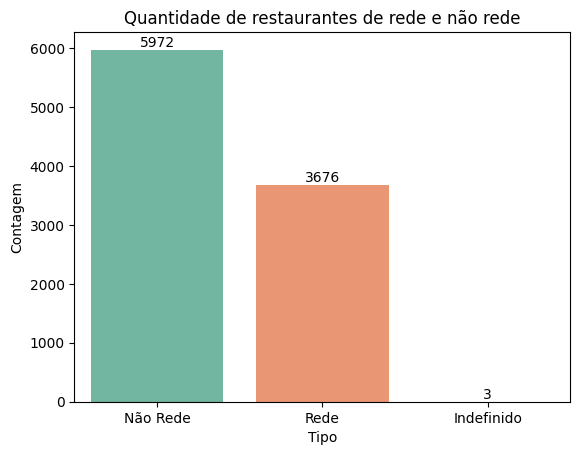

In [101]:
ax = sns.barplot(data=chain, x='Tipo', y='Contagem', palette="Set2")

#definindo valores para aparecem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',          
                (p.get_x() + p.get_width() / 2,   
                 p.get_height()),                 
                ha='center', va='bottom',          
                fontsize=10, color='black')   

ax.set_xticklabels(['Não Rede', 'Rede', 'Indefinido'])
plt.title('Quantidade de restaurantes de rede e não rede')
plt.show()

Existem 5972 estabelecimentos que não são redes e 3676 que são redes. <br>
Geralmente, fast-food costumam ser restaurante de redes, será que esse é o caso? 

### Qual tipo de estabelecimento é típico para redes?

Para fazer essa contagem, é necessário fazer um filtr por estabelecimento de é ou não rede. <br>
Vamos filtrar o chain == true e depois fazer uma contagem dos tipos de estabelecimentos.

In [102]:
chain_type = rest_data[rest_data['chain'] == True]
count = chain_type['object_type'].value_counts().reset_index(name='count')
count.columns=('Tipo', 'Contagem_Franquia')

display(count)

,Tipo,Contagem_Franquia
0,Restaurant,2292
1,Fast Food,605
2,Bakery,283
3,Cafe,266
4,Pizza,153
5,Bar,77


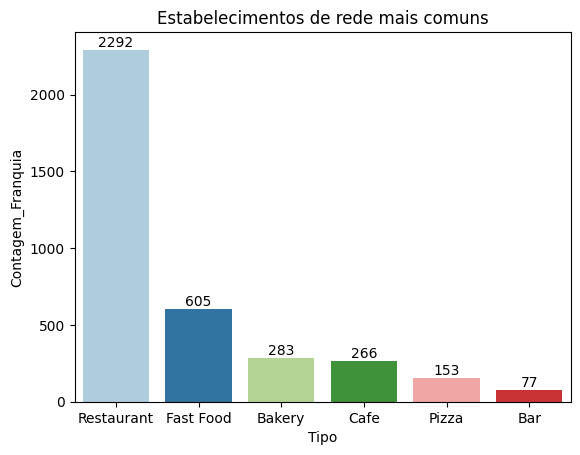

In [103]:
#plotando

ax = sns.barplot(data=count, x='Tipo', y='Contagem_Franquia', palette="Paired")

#definindo valores para aparecem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',          
                (p.get_x() + p.get_width() / 2,   
                 p.get_height()),                 
                ha='center', va='bottom',          
                fontsize=10, color='black')   

plt.title('Estabelecimentos de rede mais comuns')
plt.show()

Vamos analisar esses dados juntos com a quantidade total de estabelecimentos para entender o quanto as franquias representam no valor total.

In [110]:
#primeiro, vamos juntar os dados de top_rest_type com o count usando merge
merged_data = pd.merge(top_rest_type, count, on='Tipo', how='left')

merged_data

,Tipo,Contagem_Estabelecimento,Contagem_Franquia
0,Restaurant,7255,2292
1,Fast Food,1066,605
2,Cafe,435,266
3,Pizza,320,153
4,Bar,292,77
5,Bakery,283,283


,Tipo,Contagem_Estabelecimento,Contagem_Franquia,Proporção (%)
0,Restaurant,7255,2292,31.592006
1,Fast Food,1066,605,56.754221
2,Cafe,435,266,61.149425
3,Pizza,320,153,47.812500
4,Bar,292,77,26.369863
5,Bakery,283,283,100.000000


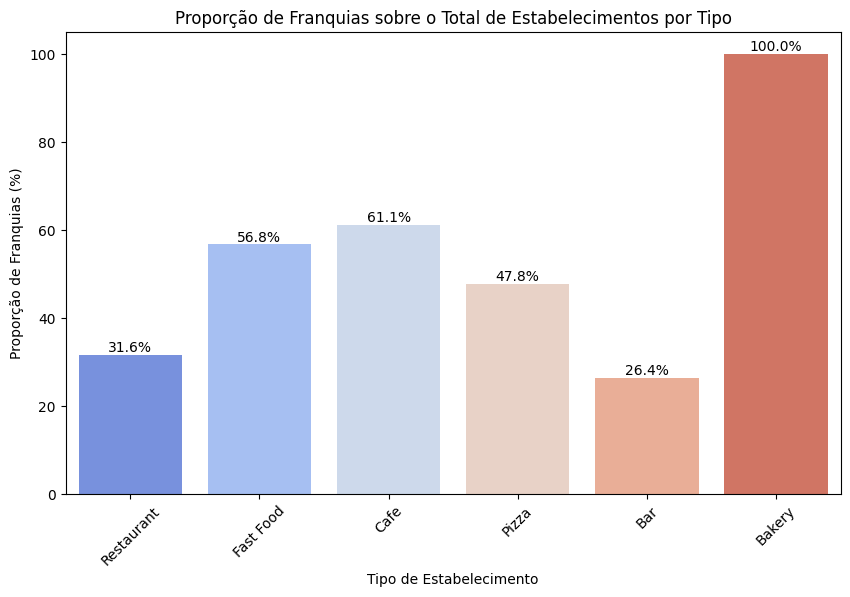

In [113]:
# calculando a proporção de franquias em relação ao total para cada tipo de estabelecimento
merged_data['Proporção (%)'] = (merged_data['Contagem_Franquia'] / merged_data['Contagem_Estabelecimento']) * 100

# Visualizando o DataFrame resultante
display(merged_data)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=merged_data, x='Tipo', y='Proporção (%)', palette="coolwarm")

# Adicionar valores de porcentagem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2, 
                 p.get_height()), 
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.title('Proporção de Franquias sobre o Total de Estabelecimentos por Tipo')
plt.ylabel('Proporção de Franquias (%)')
plt.xlabel('Tipo de Estabelecimento')
plt.xticks(rotation=45)
plt.show()


Apesar de ser maior número, aqui os restaurantes representam apenas 31,6% de franquias, enquanto padarias e café representam os maiores números, sendo 100% e 61%, respectivamente. Curiosamente, fast food que também costumam ser franquias, aqui representam apenas 57%, um pouco mais da metade.

### O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?

Em primeiro lugar, vamos verificar a média de assentos por estabelecimentos usando o describe()

In [15]:
chain_type['number'].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

Com esses dados podemos concluir que a média de assentos é de 39 e o percentil 75% é de 44, ou seja, Se um estabelecimento possui mais de 44 assentos, ele está entre os 25% com o maior número de assentos.

Vamos plotar um gráfico de caixa para demonstrar a distribuição de assentos.

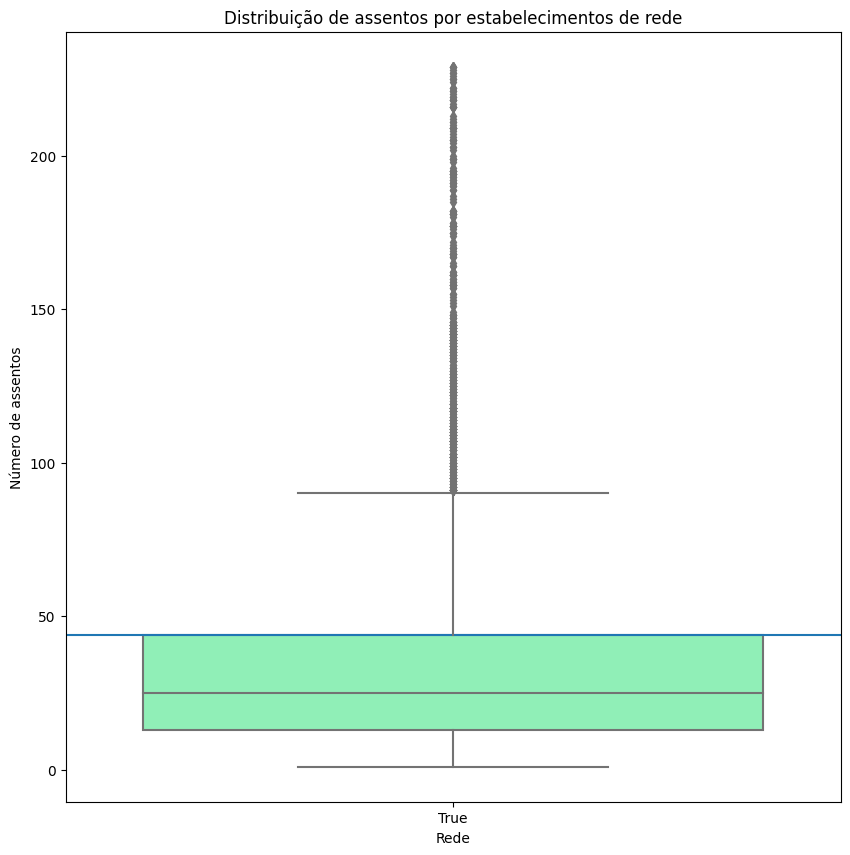

In [116]:
plt.figure(figsize=(10,10))
plt.title('Distribuição de assentos por estabelecimentos de rede')
plt.axhline(np.percentile(chain_type['number'], 75))
sns.boxplot(x="chain", y="number", data=chain_type, palette='rainbow')

plt.ylabel('Número de assentos')
plt.xlabel('Rede')
plt.show()

Em estabelecimentos de rede, há um grande número de assentos se o número for superior a 44.

Podemos concluir, então, que há muitos estabelecimentos com um pequeno número de assentos entre os estabelecimentos de rede

### Determine o número médio de assentos para cada tipo de restaurante. Em média, qual tipo de restaurante tem o maior número de assentos? Construa gráficos.

Vamos fazer um groupby para filtrar a média de assentos por tipo de restaurantes e depois um gráfico de caixa para demonstrar esses valores

In [17]:
avg_seats = rest_data.groupby(['object_type'])['number'].mean().reset_index()
avg_seats['number'] = avg_seats['number'].astype('int')
print('A quantidade média de assentos por restaurante é de:')
display(avg_seats.sort_values(by='number', ascending=False))

A quantidade média de assentos por restaurante é de:


,object_type,number
5,Restaurant,48
1,Bar,44
3,Fast Food,31
4,Pizza,28
2,Cafe,25
0,Bakery,21


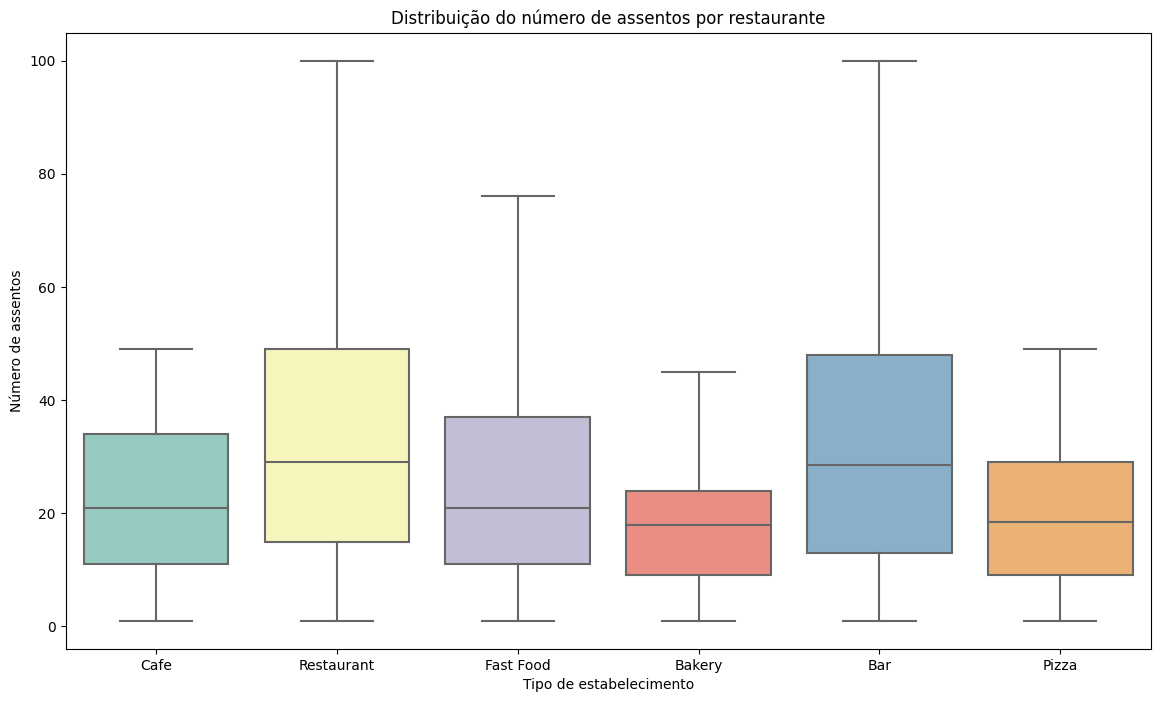

In [18]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x="object_type", y="number", data=rest_data,showfliers = False, palette="Set3")

   
plt.title('Distribuição do número de assentos por restaurante')
plt.ylabel('Número de assentos')
plt.xlabel('Tipo de estabelecimento')
plt.show()

A quantidade média de assentos por restaurante ficou assim:

- Restaurantes 48
- Bares 44
- Fast Food 31
- Pizza 28
- Cafés 25
- Padarias 21

Podemos concluir que os restaurantes tem os maiores números de assentos, seguidos de bares e fast foods.

### Coloque os dados dos nomes das ruas da coluna address em uma coluna separada.

In [19]:
#vamos olhar o df rest_data novamente

display(rest_data)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


Precisamso primeiro entender como funciona o padrão dos endereços americanos:
Eles começam com número, nome da rua e o tipo de logradouro (rua, avenida, alameda, etc).

Precisamos então definir alguns desses termos em inglês. Sabemos que BLVD, ST, AVE, RD, DR e Way são os termos mais comuns de logradouros, então vamos passá-los para uma lista.

In [20]:
logra = ['BLVD','ST','AVE','RD','DR','WAY']

Vamos definir uma função que combina a lógica de filtrar o nome da rua e ao mesmo tempo extrair as partes relevantes do endereço.

In [21]:
def get_street_and_filter(address):
    split_address = address.replace("#", "").replace("/", "").split()
    new_street = []
    
    for word in split_address:
        if word.isdigit():
            continue  # Ignora números
        if word in logra:
            new_street.append(word)
            break  # Para de adicionar se encontrar um dos finais
        new_street.append(word)
    
    return ' '.join(new_street)

# Aplica a função ao DataFrame
rest_data['street'] = rest_data['address'].apply(get_street_and_filter)


In [22]:
rest_data['street'].value_counts().head(10)

WILSHIRE BLVD        384
W SUNSET BLVD        368
W PICO BLVD          342
S WESTERN AVE        277
SANTA MONICA BLVD    262
HOLLYWOOD BLVD       241
W OLYMPIC BLVD       234
W 3RD ST             231
S FIGUEROA ST        228
W 6TH ST             213
Name: street, dtype: int64

### Construa um gráfico de dez ruas com o maior número de restaurantes.

Vamos filtrar o conjunto de dados para que nos retorne apenas restaurantes e armazena-los em 'rest'.

In [23]:
rest = rest_data[rest_data['object_type'] == 'Restaurant']

display(rest)

,id,object_name,address,chain,object_type,number,street
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14,NATIONAL BLVD
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100,WORLD WAY
...,...,...,...,...,...,...,...
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25,S LOS ANGELES ST
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD 1025,False,Restaurant,225,SANTA MONICA BLVD
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE


In [24]:
top10_st = rest['street'].value_counts().reset_index().head(10)

top10_st.columns=['Rua', 'Contagem']

display(top10_st)

,Rua,Contagem
0,WILSHIRE BLVD,309
1,W SUNSET BLVD,271
2,W PICO BLVD,257
3,S WESTERN AVE,219
4,W OLYMPIC BLVD,205
5,SANTA MONICA BLVD,204
6,HOLLYWOOD BLVD,191
7,W 3RD ST,185
8,W 6TH ST,178
9,S FIGUEROA ST,165


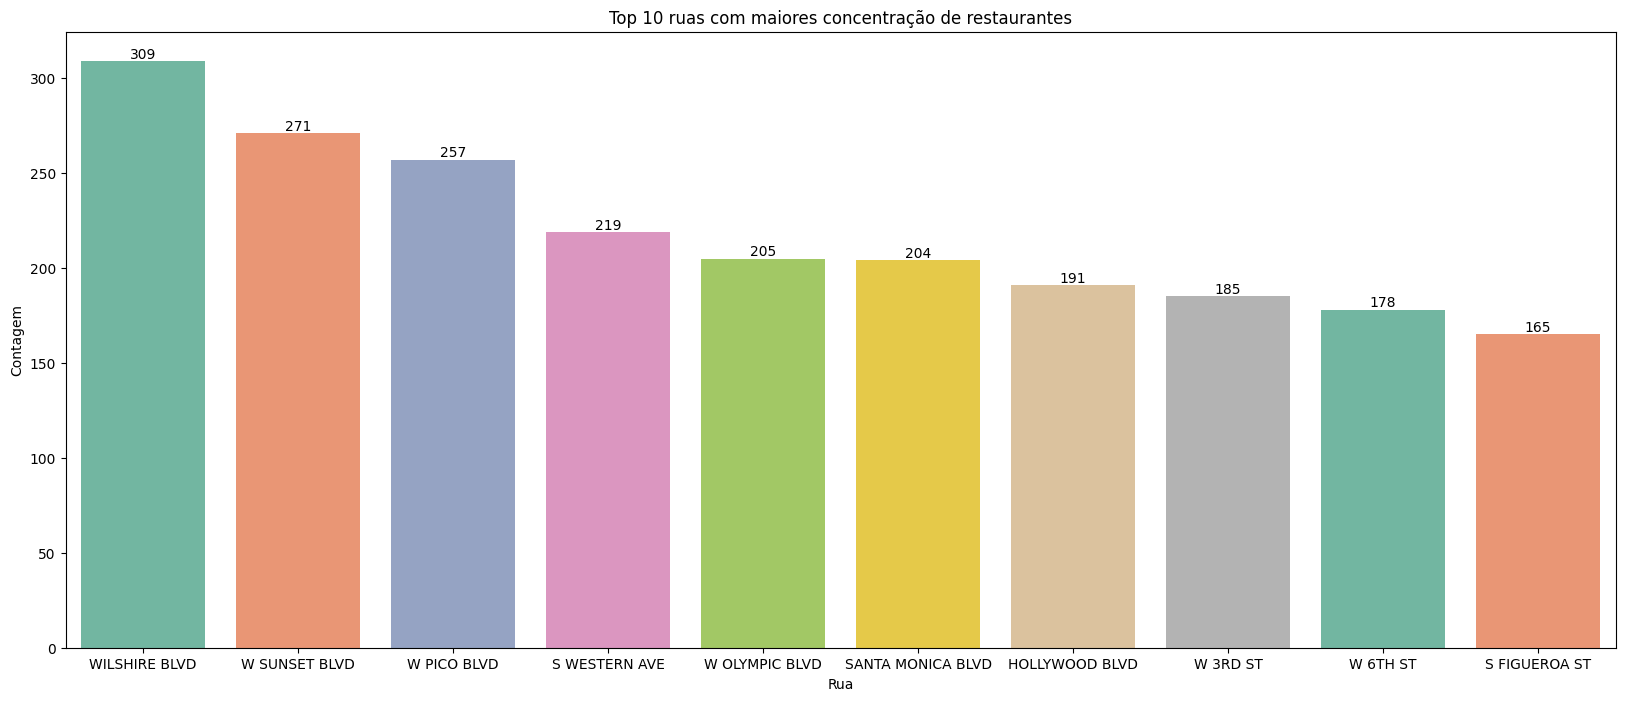

In [25]:
plt.figure(figsize=(20,8))

ax = sns.barplot(data=top10_st, x='Rua', y='Contagem', palette='Set2')

#definindo valores para aparecem no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',          
                (p.get_x() + p.get_width() / 2,   
                 p.get_height()),                 
                ha='center', va='bottom',          
                fontsize=10, color='black') 
    
plt.title('Top 10 ruas com maiores concentração de restaurantes')
plt.show()

A Wilshire Boulevard é uma das principais ruas (ou alamedas) da área de Los Angeles, que se estende da Ocean Avenue, na cidade de Santa Monica, até a Grand Avenue, no Distrito Financeiro do centro de Los Angeles. <br>

Sendo uma das principais vias arteriais leste-oeste de Los Angeles, é também uma das principais ruas da cidade de Beverly Hills. Wilshire Boulevard corre aproximadamente paralelo à Santa Monica Boulevard, de Santa Monica até o limite oeste de Beverly Hills. A partir do limite leste, ele segue uma quadra ao sul da Sixth Street até seu ponto final.

A Sunset Boulevard por sua vez, é uma das ruas mais famosas e principais ruas de Los Angeles.<br>

As 10 ruas que mais possuem restaurante são vias obrigatórias para turistas, moradores e a maioria das pessoas que se encontra em Los Angeles, o que faz sentido possuirem tantos estabelecimentos. E pode ser um ponto de interesse para definir onde o novo restaurante irá se localizar.

### Encontre o número de ruas que têm apenas um restaurante.


Vamos contar a quantidade de restaurantes por rua e armazenar em 'one_rest', em seguida, imprimimos o valor de one_rest == 1.

In [26]:
one_rest = rest['street'].value_counts().reset_index()
one_rest.columns=['Rua', 'Contagem']

In [27]:
print(f'Quantidade de ruas que possuem restaurantes:', len(rest['street'].value_counts()))
print()
print(f'Quantidade de ruas que possuem apenas 1 restaurante:', len(one_rest[one_rest['Contagem'] == 1]))

Quantidade de ruas que possuem restaurantes: 740

Quantidade de ruas que possuem apenas 1 restaurante: 363


Existem 740 ruas que possuem pelo menos um restaurante.
Dentre elas, 363 possuem apenas um restaurante, o que é menos da metade do total de ruas com restaurantes.

### Para as ruas com muitos restaurantes, olhe para a distribuição de número de assentos. Quais tendências você consegue notar?


Vamos encontrar o percentil 75% de restaurantes por ruas para definir o que são muitos restaurantes.

In [28]:
rest['street'].value_counts().describe()

count    740.000000
mean       9.804054
std       29.063427
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      309.000000
Name: street, dtype: float64

Usando o describe, podemos definir esse número como 6. Vamos criar um dataframe que armazene somente os dados onde o número de restaruante por rua seja maior que 6.

In [56]:
street_counts = rest['street'].value_counts()

# Filtrando ruas com mais de 6 restaurantes
many_restaurants = street_counts[street_counts > 6].index

# Filtrar o DataFrame original para manter apenas os restaurantes nas ruas filtradas
many_restaurants_df = rest[rest['street'].isin(many_restaurants)]

Agora podemos avaliar a quantidade média de assentos nesses restaurantes.

In [30]:
many_restaurants_df['number'].describe()

count    6209.000000
mean       47.705911
std        49.775820
min         1.000000
25%        15.000000
50%        29.000000
75%        48.000000
max       229.000000
Name: number, dtype: float64

Com a média de 47 assentos, é possível perceber que se tratam de restaurantes que podem receber várias pessoas ao mesmo tempo. Vamos armazenar esses dados em uma variavel para comparar com o top_10st e verificar se as ruas que mais tem restaurantes também são os restaurantes que mais possuem assentos.

In [70]:
average_seats_per_street = many_restaurants_df.groupby('street')['number'].mean().reset_index()
average_seats_per_street.columns = ['Rua', 'Média de Assentos']

top10_streets = street_comparison.head(10)

In [71]:
top10_streets

,Rua,Contagem,Média de Assentos
0,WILSHIRE BLVD,309,56.168285
1,W SUNSET BLVD,271,53.915129
2,W PICO BLVD,257,42.653696
3,S WESTERN AVE,219,44.776256
4,W OLYMPIC BLVD,205,54.053659
5,SANTA MONICA BLVD,204,36.921569
6,HOLLYWOOD BLVD,191,62.848168
7,W 3RD ST,185,42.800000
8,W 6TH ST,178,43.179775
9,S FIGUEROA ST,165,52.357576


In [72]:
street_comparison = pd.merge(top10_st, average_seats_per_street, on='Rua')

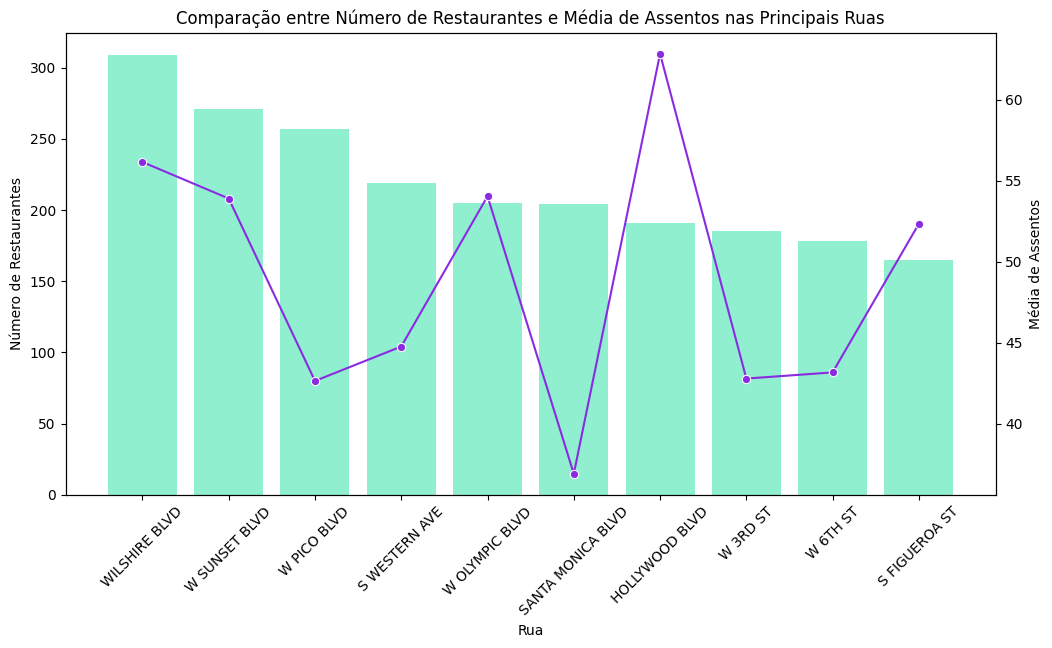

In [87]:
# Configurando o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para número de restaurantes
sns.barplot(data=top10_streets, x='Rua', y='Contagem', color='aquamarine', ax=ax1)
ax1.set_ylabel('Número de Restaurantes')
ax1.set_xlabel('Rua')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Adicionando um segundo eixo y para a média de assentos
ax2 = ax1.twinx()
sns.lineplot(data=top10_streets, x='Rua', y='Média de Assentos', color='blueviolet', marker='o', ax=ax2)
ax2.set_ylabel('Média de Assentos')

# Título e exibição
plt.title('Comparação entre Número de Restaurantes e Média de Assentos nas Principais Ruas')
plt.show()

Quando olhamos para o ranking das ruas que mais possuem restaurantes, percebemos não necessariamente as ruas com mais restaurantes são as ruas que mais possuem assentos, sendo a média de assentos é de aproximandamente 55 para a rua com mais restaurantes e quase o mesmo valor para a rua com quase a metade da concentração de restaurantes. 

Portanto, é possível analisar que nem sempre o local irá definir a quantidade de assentos, mas possívelmente o tipo de estabelecimento, já que por regra, restaurantes costumam comportar mais clientes.

### Conclusão

Para um café com serviço de garçons robôs e foco em sustentabilidade a longo prazo, é importante observar o cenário competitivo:

- Franquias são predominantes em cafés e padarias, o que representa um desafio significativo para pequenas empresas que competem com esses grandes players, cujos preços geralmente são mais competitivos. Para uma nova empresa, igualar essas margens é difícil, aumentando o risco de entrar nesse mercado.

- Já restaurantes, embora numerosos, têm uma presença de franquias menor, o que permite uma concorrência mais equilibrada entre os estabelecimentos. Isso cria uma oportunidade para uma empresa diferenciada.

- A recomendação é iniciar o estabelecimento com cerca de 50 assentos em uma rua movimentada, de preferência com alto fluxo turístico. A inovação dos garçons robôs pode atrair atenção e fazer do café uma atração única na área.

## Apresentação

O link da apresentação é esse:

https://drive.google.com/file/d/1w2TRrXaeY1nHFw5UWlaTqNSpW-p6v2I2/view?usp=drive_link